In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
gold=pd.read_csv("gld_price_data.csv")

In [3]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold.shape

(2290, 6)

In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

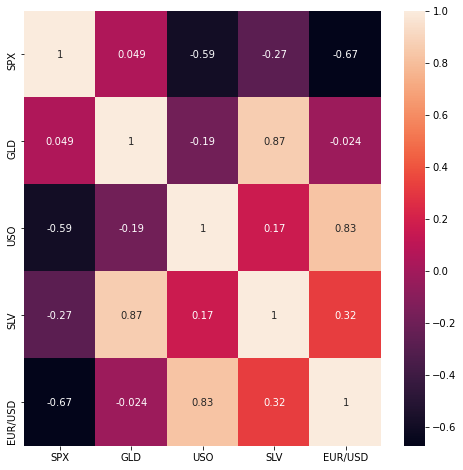

In [7]:
correlation=gold.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True)

In [8]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Mohammed Kamran\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

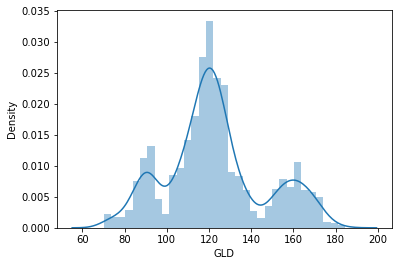

In [9]:
sns.distplot(gold['GLD'])

In [10]:
X=gold.drop(["GLD","Date"],axis=1)
y=gold['GLD']

In [11]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [12]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
rf=RandomForestRegressor(n_estimators=100)


In [15]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
test_data_prediction=rf.predict(X_test)

In [17]:
print(test_data_prediction)

[168.25699938  81.79560004 116.24070054 127.6613005  120.71560128
 154.76149778 150.42529932 125.86210041 117.48829869 125.95390036
 116.53370097 172.08630035 140.85549842 167.75509823 115.17629987
 117.75700062 138.52850343 169.70800073 159.90300275 157.59519885
 154.99889991 125.09320036 176.4207995  157.05110387 125.22790046
  93.75499995  77.14210014 120.46610005 119.10169907 167.49779954
  88.15760017 125.24540034  91.05650039 117.73020025 121.00709931
 135.90650059 115.73050175 115.19570066 147.95469941 107.24660086
 104.32850264  87.28509797 126.46820034 117.97059988 153.1538985
 119.77580014 108.40750005 108.32669833  93.07400046 127.30729702
  74.56040046 113.64539956 121.38729998 111.16669885 118.83939897
 120.94589934 158.9706008  167.69210111 146.87669694  85.88299894
  94.38510056  86.76529916  90.5821002  119.05600078 126.38150088
 127.67210065 169.09519997 122.25599934 117.50719886  98.4891001
 168.59960195 143.00289832 131.95200176 121.24180233 120.9227994
 119.70680036

In [18]:
score=metrics.r2_score(y_test,test_data_prediction)

In [19]:
score

0.9887318989738304

In [20]:
y_test=list(y_test)

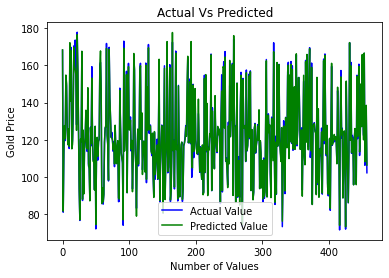

In [21]:
plt.plot(y_test,color='blue',label="Actual Value")
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Vs Predicted")
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()